# Week 02 - Data Pre-Processing Workshop


By the end of this notebook you 

>* understand the general steps for data pre-processing
>* play with some data pre-processing tools
>* understand the importance of data partitioning
>* understand the importance of cross-validation
>* fit some basic models on your data


1. [Problem Understanding and Setup](#setup)

2. [Creating a Train-Test Set](#gen)

3. [Exploratory Data Analysis](#eda)

4. [Data Cleaning](#clean)

5. [Feature Engineering](#engin)

6. [Summary](#sum)

7. [Extra](#extra)

---

This week we are going to focus more on Pre-Processing and Feature Engineering. There will be some useful tools related to this step. 

The workshop will still be structured like an example project over a specific data set, but actual modelling part is going to be extra work. For this reason, keep in mind that; 

>- You will see some CORE and EXTRA tasks for the first workshop. 
>- Primarily, you should aim to complete the CORE components during the WS session, but afterwards you can try to complete the EXTRA tasks for your self-learning process. 
>- In general, weekly hand-ins attached to our WS sessions aimed to be useful for your projects.
>- In some Exercises, you will see some beneficial hints at the bottom of questions

Regarding the submission, 

>- Please submit a pdf of your notebook on learn by 4pm on the Friday of the week the workshop was given; each workshop forms part of your assessment (1% of the total marks each).
>- You don't need to finish everything, but should have had a substantial attempt at the bulk of the material. In general, you can aim to complete all the CORE tasks.
>- For submission, you can simply select the print option in your browser which should generate a high-quality pdf of your complete notebook. 

# 1. Problem Understanding and Setup <a id='setup'></a>
Like last week lets start by examining an example problem based on [previous research](https://doi.org/10.1016/S0167-7152(96)00140-X).

## 1.2. Workspace

Before downloading any data we should think about our workspace. In this course we are going to be primarily be using .ipynb notebooks in the workshops. A notebook environment is very useful for data science projects as it allows for rapid testing of ideas with on-screen visualisation of the results. 

### 1.2.1. Uploading your files to the Noteable

Officially, when you click the **Noteable LTI 1.3.** icon in the course Learn page, you can reach out to the related service. 

Currently (October 2022), there are various available notebooks on a dropdown list, the one that we need is **Standard Notebook (Python 3)**. When you just click **Start** button and then **Reconnect**, you will have an access to the **Jupyter environment** via Noteable tool. 

Whenever you open a new Python notebook from the New button on the upper right, you will get an empty notebook to work. This notebook will be saved in your noteable account, when you click save button on the above panel after making any changes.  

To keep things organised, you can also create a folder "MLP" within your account, and then a sub-directory for each week like "Week-j". In general, for the workshop materials, this process will be automatic by following a couple of button clicks. Alternatively, if you do this manually, you can then upload the main .ipynb and all necessary files from Learn page to your "Week-j" folder to work with. 

__Reminder__ 

- You may need to restart the runtime several times in the workshop, but you will not need to re-upload or unzip files again. 

### 1.2.2. Displaying solutions

- Solutions will be released after the workshop hand-in deadline via noteable and the course Learn page regularly.   

- Once released you will be able to run the given files in your noteable account, which will allow you to reveal the solutions.

For the details about the use of noteable, please have a look at the related video shared in Learn page, 
under week-1. 

### 1.1.3. Packages

Once again, the followings are widely used libraries to start working with Python in general. 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.1.4. Being Reproducable

In these types of projects, reproducibility issue is another important property that we need to sustain. Think about a project having bunch of codes with different steps including random data partitioning, or data generation process at the beginning. There is a real crisis out there, regarding the obtained research findings using Machine Learning tools. 

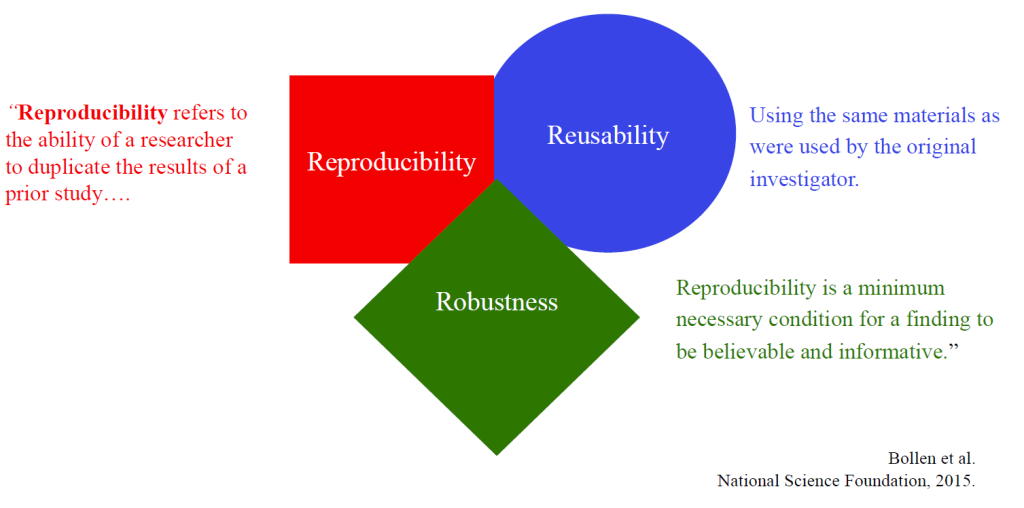

Feel free to have a look at this reading; 

- https://syncedreview.com/2019/09/26/reproducibility-challenges-in-machine-learning-for-health/

As our first steps, the following code simply guarantees that the output of this note-book is identical at each run since we are fixing the value in the numpy random seed about the state of randomness. This ensures that, every step including randomness, will exactly produces the same output throughout the whole script when we re-run the code snippets later on. 

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

### Funny Story about the number 42

In Douglas Adams’s popular 1979 science-fiction novel The Hitchhiker’s Guide to the Galaxy, towards the end of the book, the supercomputer Deep Thought reveals that the answer to the great question of “life, the universe and everything” is 42. From that novel, 

[Seven and a half million years later…. Fook and Lunkwill are long gone, but their descendants continue what they started]

- “All right,” said Deep Thought. “The Answer to the Great Question…”

- “Yes..!”

- “Of Life, the Universe and Everything…” said Deep Thought.

- “Yes…!”

- “Is…” said Deep Thought, and paused.

- “Yes…!”

- “Is…”

- “Yes…!!!…?”

- “Forty-two,” said Deep Thought, with infinite majesty and calm.”

―Douglas Adams, The Hitchhiker’s Guide to the Galaxy

>- Generally speaking, 42 is not necessary for sure but when you select some value, you should stick to it for the whole script. In terms of reproducibility issue, if we run the same code with the same seed number, we will able to produce the same output.

## 1.2. Problem

This week the data and problem setup come from [Géron, A. (2019)](https://ed.primo.exlibrisgroup.com/permalink/44UOE_INST/1viuo5v/cdi_proquest_ebookcentral_EBC4822582), so if you did last weeks reading you may already be familar with the setup.

> Welcome to Machine Learning Housing Corporation! The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.
>
> **Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.**
>
> The first question to ask your boss is what exactly is the business objective; building a model is probably not the end goal. **How does the company expect to use and benefit from this model?** This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to evaluate your model, and how much effort you should spend tweaking it.
>
> The next question to ask is **what the current solution looks like (if any)**. It will often give you a reference performance, as well as insights on how to solve the problem. Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.
>
> This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 20%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price given other data about that district. The census data looks like a great dataset to exploit for this pur‐ pose, since it includes the median housing prices of thousands of districts, as well as other data.

---

---

### 🚩 Exercise 1

Using the information above answer the following questions about how you may design your machine learning system.

a) Is this a supervised or unsupervised learning task? 

b) Is this a classification, regression, or some other task?

c) What if the downstream system the output of your model will feed into requires a categorical input (e.g., "cheap," "medium," or "expensive"). Will this be the same or different task?

## 1.3. Data Download

The data we will be using this week is a modified version<sup>1</sup> of the California Housing dataset<sup>2</sup>.

We can get the data a number of ways. The easiest is just to load it from the data folder provided (where I have already downloaded it to).

In [5]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- You could also download it from [Géron's github](https://github.com/ageron). 

- Building a small function to download the data and then load it is good practice if in the future you use a database that is updated or your model is deployed in practice (where you may fetch and re-train your model multiple times).

- This the data is also available on Kaggle (https://www.kaggle.com/datasets/camnugent/california-housing-prices). 

## 1.4. Inital Look at the Data Structure

This is not going to be a full EDA, but just to get a quick feel for the data. Its important not to do much here as really this is just going to be used to help us make an appropriate test set. This is __NOT__ to examine patterns between your attributes that could help your model performance - this is called _data snooping_ and could give you an overly optimistic estimate of the generalisation error. 

- **Data snooping** is a form of statistical bias manipulating data or analysis to artificially get statistically significant results. Alternative names: **data dredging**, **data fishing**, **p-hacking**.

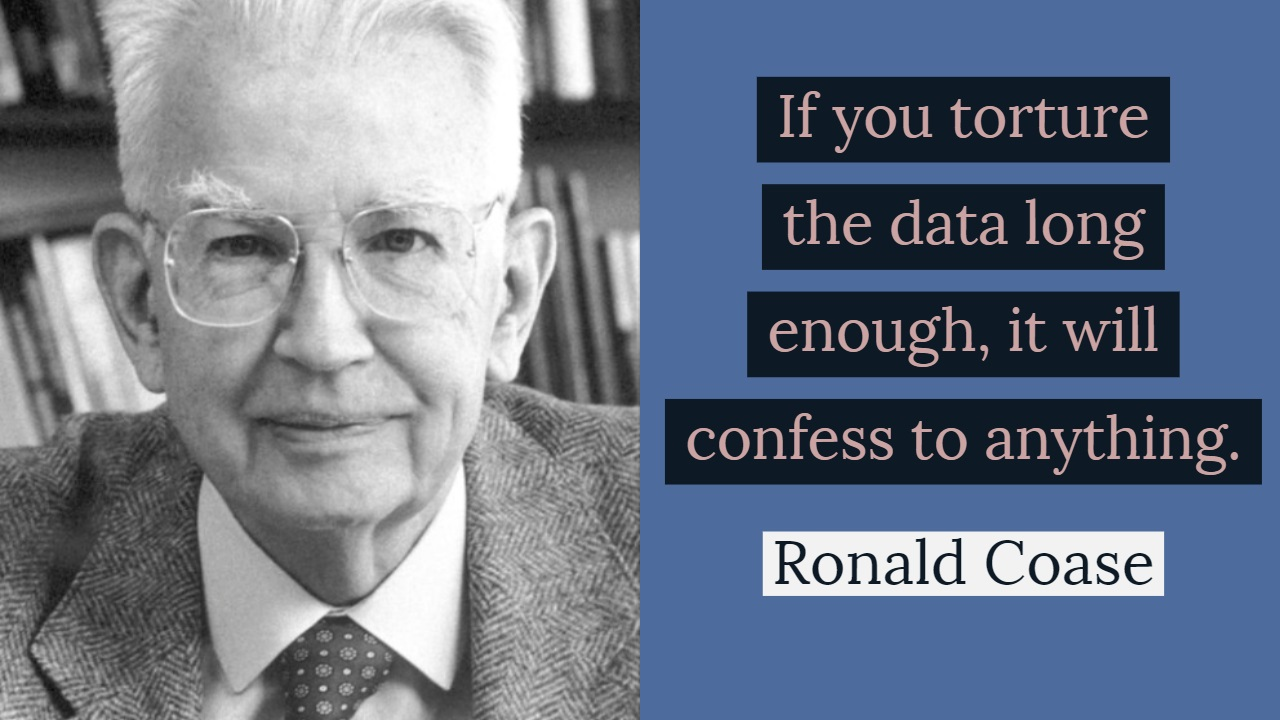

Humans after all are very good at pattern recognition and identifying too many patterns here before splitting your data could lead to you focusing on patterns specific to the test set.

Let us first examine the [Data Dictionary](https://www.kaggle.com/camnugent/california-housing-prices).

> `longitude`: A measure of how far west a house is; a higher value is farther west
>
> `latitude`: A measure of how far north a house is; a higher value is farther north
>
> `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
>
> `totalRooms`: Total number of rooms within a block
>
> `totalBedrooms`: Total number of bedrooms within a block
>
> `population`: Total number of people residing within a block
>
> `households`: Total number of households, a group of people residing within a home unit, for a block
>
> `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
>
> `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
>
> `oceanProximity`: Location of the house w.r.t ocean/sea

As we can see above the data has 10 attributes. Lets start examine the data structure using `.info`.

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


---

### 🚩 Exercise 2

From the information provided above, can you anticipate any data cleaning we may need to do?

---

### 🚩 Exercise 3

Using descriptive statistics and histograms to examine the distributions of the numerical attributes, can you identify other pre-processing/feature engineering steps we may need to do?
<br><br>
<details><summary><b><u>Hint</b></u></summary>
- <code>.describe()</code> can be used to create summary descriptive statistics on a pandas dataframe.
- You can use a <code>sns.histplot</code> to create histograms
</details>

- One thing you may have noticed from the histogram is that the median income, housing median age, and the median house value are capped. 

- The median house value capping (this being our target value) may or may not be a problem depending on your client. If we needed precise predictions beyond $\$500,000$ we may need to either collect proper labels for the districts whose labels were capped or remove these districts from the training and test set. 

- We'll do the latter for this workshop.

In [12]:
housing = housing[housing["median_house_value"] < 500000]

---

### 🚩 Exercise 4
What are the possible categories for the `ocean_proximity` variable?
- Are there a similar number of instances in each category?

---

# 2. Creating a Train and Test Set <a id='gen'></a>

There are lots of ways of creating a test set. Last week we used a helpful function from `sklearn.model_selection` called `train_test_split`. Although we didn't go into the details too much then, lets have a look into creating good test sets now using this helper function.

When no class labels are provided, `train_test_split` just defaults to randomly sampling the data to split it into training and validation/test sets (this is what we did last week). 

However, this week lets first just split our dataset without shuffling for practice using the function.

### 🚩 Exercise 5

Use `train_test_split` to split the data randomly into training (77%) and test (33%) sets without shuffling the data first.

- Can you think on a scenario where not shuffling would be a good idea?
- What about when we would want to shuffle our data?

In [14]:
from sklearn.model_selection import train_test_split


In [ ]:
%run scripts/show_solutions.py week02_ex5

---

### 🚩 Exercise 6 (Extra)

Create your own function alike to `split_train_test` using `numpy`? 

- Can you get the same split created using `train_test_split` (without shuffling)?

<details><summary><b><u>Hint</b></u></summary>
- make sure your <code>train_size</code> or <code>test_size</code> is the same between the two methods.
</details>

In [ ]:
%run scripts/show_solutions.py week02_ex6

---

`train_test_split` can also do _"stratified splitting"_. What this means is that the data _"is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population"_ based on the class labels.

Imagine that an expert tells us that `ocean_proximity` is incredibly important for predicting `median_house_value`. We may want to ensure that the test set is representative of the various categories of `ocean_proximity`. Therefore we can use stratified splitting to ensure that the proportions of `ocean_proximity` are similar in the test set to the training set.

__Notes__
- We will use these for the rest of the workshop but you could use the next ones as well, you may just get different results.

In [17]:
class_labels = "ocean_proximity"

train_set, test_set = train_test_split(housing, train_size=0.77, 
                                       stratify = housing[[class_labels]])

As can be seen below, stratified sampling leads to less sampling bias in our test data.

In [ ]:
def income_cat_proportions(data, variable):
    return data[variable].value_counts() / len(data)

train_shuf, test_shuf = train_test_split(housing, train_size=0.77, shuffle=True)

overall = income_cat_proportions(housing, class_labels)
random = income_cat_proportions(test_shuf, class_labels)
strat = income_cat_proportions(test_set, class_labels)

compare_props = pd.DataFrame({
    "Overall": overall.values,
    "Random": random.values,
    "Stratified": strat.values,
}, index = housing.loc[:,class_labels].unique())

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props.round(3)

Stratified sampling is often used on the output varible to ensure represesentative performance evaluation (particularly when there is a large imballance). In this case our output (`median_house_value`) is a continuous numerical attribute, so first we will have to turn it into stratum.

---

### 🚩 Exercise 7

Using `train_test_split` create a stratified split on `median_house_value` after binning the data into strata.

__Note__
- It is important that there is a sufficient number of instances of data in each stratum (as we may introduce bias), so don't create too many strata.
- If you were to use this set for the rest of the worksheet you would still want to use `median_house_value` as a continuous attribute for our regression model, so make the binned version a new column that you remove after splitting the data.

<details><summary><u><b>Hint</b></u></summary>

- You can use `pd.cut` to bin the data.

</details>

In [ ]:
%run scripts/show_solutions.py week02_ex7

---

# 3. Exploratory Data Analysis <a id='eda'></a>

Now we have a general understanding of the data we now want to look into the training set to get more information we can use for developing our model.

Lets start by making a copy of our training set to ensure while we explore we don't accidentally mess with our training data we will use to model.

__Notes__
- If your data is huge, at this stage you may want to create a smaller exploration set.

In [20]:
explore_set = train_set.copy()

---

The first two features in the dataset are geographical information (`latitude` and `longitude`), which are a good candidate for visualisation.

### 🚩 Exercise 8
Explore `latitude` and `longitude` using a scatterplot.

- Look at adding additional information to this plot using size and color.
- What can this tell us about our output variable?

In [ ]:
%run scripts/show_solutions.py week02_ex8

---

### 🚩 Exercise 9

Examine if/which of the features are correlated to each other.

- Can you think of any reason why certain features may be correlated?

In [ ]:
%run scripts/show_solutions.py week02_ex9

### 🚩 Exercise 10
Are any of the features correlated with our output variable?

- How might we use this information in later steps of our model pipeline?

In [ ]:
%run scripts/show_solutions.py week02_ex10

---

# 4. Data Cleaning <a id='clean'></a>

Last week, because we were using `feature_engine` for convienience for some pipeline steps, I was not very specific about the output type from the functions. This week we are going to adhere more to the Scikit-Learn Design principles when creating our pipeline steps. Specifically<sup>1</sup>:

> __Nonproliferation of classes__. Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

This means all our functions this week are going to input and output Numpy arrays. You can of course use pandas functions if you wish in your function, just make sure you convert the data back to output the Numpy array!

Lets start by splitting our features from our target variable.

In [ ]:
X_train = train_set.drop("median_house_value", axis=1)
features = list(X_train.columns)
X_train = X_train.values

y_train = train_set["median_house_value"].copy()
y_train = y_train.values

display(X_train)
display(y_train)

---

## 4.1. Detecting Duplications

As we did last week, lets first look for duplicated observations.

### 🚩 Exercise 11

Are there any duplicated values in the training set? 
- If so how many?

In [ ]:
%run scripts/show_solutions.py week02_ex11

---

## 4.2. Anomaly Detection

As mentioned in the lecture, the problem of detecting anomalies in data can be approached as an _unsupervised learning problem_ or an _imballanced supervised problem_. Most of the methods relevent for these two approaches to anomaly detection are going to be discussed in more detail in later weeks. Therefore for this week, we will just use basic statistics to identify outliers.

---

### 🚩 Exercise 12

Can you identify any potential outliers using boxplots?

In [ ]:
%run scripts/show_solutions.py week02_ex12

---

A basic method of removing outliers is to use the inter-quartile range (IQR) proximity rule (Tukey fences) which states that a value is an outlier if it falls outside these boundaries:

IQR = 75th quantile - 25th quantile

Upper boundary = 75th quantile + (IQR * $k$) 

Lower boundary = 25th quantile - (IQR * $k$)

$k$ is a nonnegative constant which is typically set to 1.5.

### 🚩 Exercise 13

Create a function to find the upper and lower boundaries for the Tukey fences. Use this to find the number of outliers in each of the variables.
- What are the effects of changing $k$ from 1.5 to 3? 
- Do you think the detection of outliers will be affected by the distribution of the variable?

__Notes__
- As you haven't dropped any NA values yet, you may get a warning about NA's in the data (`total_bedrooms`).

<details><summary><b><u>Hints</b></u></summary>

- You may want to use <code>.quantile()</code> on a pandas Series.
    
- You may want to use <code>np.where</code>.
    
- This will not work on categorical variables.
</details>

In [ ]:
%run scripts/show_solutions.py week02_ex13

---
After detecting outliers we may want to set them to NA values so we can use subseqent methods to either remove them (4.3. NA Removal) or impute their values (4.4. Data Imputation). As mentioned last week, it is a good idea to make our methods into functions that are compatible with scikit-learn, so that we can use them in a `Pipeline` later on. 
 
### 🚩 Exercise 14

Create a function that turns values defined as outliers by Tukey fences into `np.nan` values. 
- Use the `FunctionTransformer` from `sklearn.preprocessing`, to turn your function above into a `Pipeline` compatible transformer.

In [28]:
from sklearn.preprocessing import FunctionTransformer


In [ ]:
%run scripts/show_solutions.py week02_ex14

### 🚩 Exercise 15 (Extra)

After reading the next section below on NA Removal and learning about creating custom resamplers/transformers without a `FunctionSampler`/`FunctionTransformer`, come back here and create your own custom transformer for turning outliers detected using Tukey fences into NA values.

In [ ]:
%run scripts/show_solutions.py week02_ex15

---

## 4.3. NA Removal

Most ML models cannot handle missing values, and as we saw earlier, there are some present in `total_bedrooms` (more if we use this after the iqr function we just made). 

There are a number of ways we can deal with missing values but to start with, lets just remove NA values. We can do this in two ways by either:
1. Get rid of the corresponding observations.
2. Get rid of the whole attribute.

To do this outside of a pipeline is relatively straight forward, we just run `train_set.dropna()` with either the `axis` set to `0` or `1` (depending if we want to remove rows or columns) before splitting our data into feature (`X_train`) and labels (`y_train`). However if we want to do this in a pipeline we can use the `FunctionSampler` from `imblearn`, as we did last week. Your function may have looked a bit like below:

In [ ]:
from imblearn import FunctionSampler

def drop_na(X, y, axis=0):
    data = np.concatenate([X,y.reshape(-1,1)], axis=1)
    df = pd.DataFrame(data)
    
    # using dropna instead of numpy as already handles lots of
    # data types so we can put all our data in.
    df = df.dropna(axis=axis)
    
    data = df.values
    
    return data[:,:-1], data[:,-1]

na_sampler = FunctionSampler(func=drop_na,    # our custom function
                             validate=False)  # prevents both inputs being changed to numpy arrays
X_train_, y_train_ = na_sampler.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)
print(X_train_.shape)
print(y_train_.shape)

As we discussed last week, to create a custom resampler, all you need is to create a class that implements three methods: `fit()`, `resample()`, and `fit_resample()`. Therefore you could also write it like the following...

__Note__
- If you add `BaseEstimator` as a base class (and then avoid using `*args` and `**kargs` in your constructor) you will also be able to use the methods `get_params()` and `set_params()`, which can be useful if you intend to use hyperparameter tuning<sup>1</sup>.
- As `samplers` are only applied to the data during training, you cannot use them when making predictions. Therefore you'll have to make sure your test set does not have NA's outside of your pipeline.

In [32]:
from sklearn.base import BaseEstimator

class NARemover(BaseEstimator):
    def __init__(self, axis=0): # no *args or **kargs
        """
        Axis: Determine if rows or columns which contain missing values are removed.
        0, or ‘index’ : Drop rows which contain missing values.
        1, or ‘columns’ : Drop columns which contain missing value.
        """
        self.axis = axis
    
    def fit(self, X, y):
        return self  # nothing to do
    
    def resample(self, X, y):
        # copy to not alter input
        X_ = X.copy()
        y_ = y.copy()
        
        # turn to a numpy array if a pandas df
        if isinstance(X_, pd.DataFrame):
            X_ = X_.values
        if isinstance(y_, pd.DataFrame):
            y_ = y_.values.flatten()

        X_, y_ = drop_na(X_, y_, axis=self.axis)

        return X_, y_
        
    def fit_resample(self, X, y=None):
        self.fit(X, y)
        return self.resample(X, y)

---

### 🚩 Exercise 16

Using either the `na_sampler` or `NARemover` above, remove any observations with missing data in any of the variables.

- You may also want try using the version of the training data you created to answer exercises 14 and 15 with "outliers" turned to `np.nan` values.

In [ ]:
%run scripts/show_solutions.py week02_ex16

## 4.4. Data Imputation

Instead of removing the missing data we can set it to some value. To do this, Scikit-Learn gives us a handy `SimpleImputer` method which provides a number of stategies (e.g. `"median"`).

In [ ]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="mean")

If we just applied this to our training data now we will get an error.

```
ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'INLAND
```

This is because the "median" strategy can only be used with numerical attributes so we need a way of only applying imputation to certain attributes. As with most things in Python, there are a number of options available to us (you may have already used one of them in answers to previous questions): 

- We could temporarily remove the categorical feature from our data to apply our function
```
X_train_num = X_train[:,:-1]
X_train_num = num_imputer.fit_transform(X_train_num)
```
- Apply the function to a subset of the data and assign the output to the same subset 
```
X_train[:,:-1] = num_imputer.fit_transform(X_train[:,:-1])
```

However scikit-learn has a handy function to specify what column we want to apply a function to (its also compatible with `Pipeline`'s as well).

In [ ]:
from sklearn.compose import ColumnTransformer

num_cols_imputer = ColumnTransformer(
    # apply the `num_imputer` to all columns apart from the last
    [("num", num_imputer, list(range(X_train.shape[1]-1)))],
    # don't touch all other columns, instead concatenate it on the end of the
    # changed data.
    remainder="passthrough"
) 

X_train_ = num_cols_imputer.fit_transform(X_train)
print("Number of Missing Values")
pd.DataFrame(X_train_, columns=features).isna().sum()

After using `.fit` we can see that this method stores the median value for each attribute on the training set. This value can be used when validating and testing the model as it will be used if there is missing data in the new data.

__Note__
- To access the fitted `num_imputer` in this case, you first needed to subset the `transformers_` in `ColumnTransformer` to only the first tuple (`[0]`), and then get the second object (`[1]`) in the list (the `num_imputer`).

In [ ]:
display(num_cols_imputer.transformers_[0][1].statistics_)

However, imagine we did have a situation where we had missing values in our categorical variable...

In [37]:
X_train_missing = X_train.copy()
na_indices = np.random.choice(len(X_train_missing), 40, replace=False)
X_train_missing[na_indices,-1] = np.NaN

...then in this case if we did want to impute categorical data, then we could use `strategy = "constant"` and provide a `fill_value`.

In [ ]:
cat_imputer = SimpleImputer(strategy="constant", 
                            fill_value="missing_value") # the default

# This way will not change the order of the columns!
cat_cols_imputer = ColumnTransformer([
    # do nothing to the numerical features
    ("num", "passthrough", list(range(X_train.shape[1]-1))), 
    # apply the `cat_imputer` to the last column
    ("cat", cat_imputer, [X_train.shape[1]-1]),
]) 

X_train_missing = cat_cols_imputer.fit_transform(X_train_missing)

np.unique(X_train_missing[:,-1])

We could also use both at the same time in the `ColumnTransformer` to apply the appropriate transformations to each column. 

__Note__
- If the input is a DataFrame, then you can use the column names.

In [ ]:
from sklearn.compose import ColumnTransformer

imputer = ColumnTransformer([
    # apply the `num_imputer` to all columns apart from the last
    ("num", num_imputer, list(range(X_train.shape[1]-1))), 
    # apply the `cat_imputer` to the last column
    ("cat", cat_imputer, [X_train.shape[1]-1]),
]) 

X_train_ = imputer.fit_transform(X_train)
pd.DataFrame(X_train_, columns=features).isna().sum()

---

### 🚩 Exercise 17

Using the `SimpleImputer`, as demonstrated above, change any missing numerical variable to the average value.

- You may also want try using the version of the training data you created to answer exercises 14 & 15 with "outliers" turned to `np.nan` values to see if this changes the average values used for imputation.

In [ ]:
%run scripts/show_solutions.py week02_ex17

---

### 🚩 Exercise 18 (Extra)

Have a look at other pre-made Imputation and outlier methods available in `sklearn` and in the `feature-engine`.

---

# 5. Feature Engineering <a id='engin'></a>

As discussed in the lectures, feature engineering is where we extract features from data and transform them into formats that are suitable for machine learning models.

## 5.1. Categorical Variables

In the dataset we have an text attribute (`ocean_proximity`) we have already had to treat differently when cleaning the data. This extends to feature engineering as well, where we need to use separate methods than those used with numerical variables.

As we did in exercise 4, if we look at the unique values of this attribute we will see that there are a limited number of possible values which represent a category. We need a way of encoding this information into our modeling framework by converting our string/categorical variable into a numeric representation that can be included in our models.

As discussed in the lecture, if we have a binary categorical variable (two levels) we could accomplish this by picking one of the categorical levels and encode it as 1 and the other level as 0. To do this in Python we can compare our categorical vector to the value of our choice and then cast (convert) the result to an integer type. In the example below, imagine for the purposes of our model we only wanted to know if the property was "inland" or not, then we could do the following.

In [ ]:
X_train_ = X_train.copy() # so we don't overwrite our training data
X_train_[:,-1] = (X_train_[:,-1] == "INLAND").astype(int) # Returns either 0 or 1

print("Original")
display(X_train[:,-1])
print("Encoded")
X_train_[:,-1]

---

In this case as we have multiple categories, we would probably want to use another encoding method...

### 🚩 Exercise 19

Encode the categorical feature `ocean_proximity` using both the `OrdinalEncoder` and `OneHotEncoder` found in `sklearn.preprocessing`.

- Which encoding method do you think is most appropriate for this variable and why?

__Note__

- The output of the `OneHotEncoder` provided in Scikit-Learn is a SciPy _sparse matrix_, instead of a NumPy array. These are useful when you have lots of categories as your matrix becomes mostly full of 0's. To store all these 0's takes up unnessisary memory, so instead a sparse matrix just stores the location of nonzero elements. The good news is that you can use a sparse matrix similar to a numpy matrix, but if you wanted to, you can convert it to a dense numpy matrix using `.toarray()`<sup>1</sup>.
- The above does not seem to be the case if passed through a `ColumnTransformer`.

In [ ]:
%run scripts/show_solutions.py week02_ex19

## 5.2. Numerical Variables

---

### 🚩 Exercise 20

Which variables in our data are classed as counts and how are they distributed?

In [ ]:
%run scripts/show_solutions.py week02_ex20

---
### 5.2.1. Quantizing
Quantizing is one solution to containing the scale of a count, as mentioned in the lecture.

### 🚩 Exercise 21

Using one of the count variables, examine the effect of binning our data using fixed-width or adaptive (using "quantiles") quantizing.

<br>
<details><summary><b><u>Hints</b></u></summary>

- You can use <code>np.digitize</code> to do fixed-width binning and <code>pd.qcut</code> for quantile binning.

- To visualise your quantized data you may want to use a <code>countplot</code> from <code>seaborn</code>.
</details>

In [ ]:
%run scripts/show_solutions.py week02_ex21

---
### 5.2.2. Box-Cox Transformation

Instead of using above we may wish to apply transformations to our data (e.g. log).

### 🚩 Exercise 22

Using the same variable as exercise 21, using the `boxcox` transform from `scipy.stats`, examine a few different values of $\lambda$ and decide which may be useful.
<br>
<details><summary><b><u>Hint</b></u></summary>

- Using the function above, if `lmbda=None` then the function will _"find the lambda that maximizes the log-likelihood function and return it as the second output argument"_<sup>5</sup>.
</details>

In [ ]:
%run scripts/show_solutions.py week02_ex22

### 🚩 Exercise 23 (Extra)

Create a `Pipeline` compatible transformer to do a boxcox transformation.

In [ ]:
%run scripts/show_solutions.py week02_ex23

---

### 5.2.3. Feature Combinations

Looking at the datas attributes we may also want to manually combine them into features that are either a more meaningful representation of the data or have better properties.

For example, we know the number of rooms in a district, but this may be more useful to combine with the number of households so that we have a measure of rooms per household.

In [ ]:
col_names = "total_rooms", "households"
rooms_ix, households_ix = [explore_set.columns.get_loc(c) for c in col_names] 

rooms_per_household = X_train[:,rooms_ix]/X_train[:,households_ix]
rooms_per_household

---

### 🚩 Exercise 24

Can you think of other combinations that may be useful?

<br />
<details><summary><b><u>Hint</b></u></summary>
What about the following?
   
- `population_per_household`
    
- `bedrooms_per_room`
</details>

In [ ]:
%run scripts/show_solutions.py week02_ex24

---

### 🚩 Exercise 25 (Extra)

Create a custom transformer that creates these new combinations of features using the `FunctionTransformer`.

In [ ]:
%run scripts/show_solutions.py week02_ex25

---

### 🚩 Exercise 26 (Extra)

Create a custom transformer that creates these new combinations of features __without__ using the `FunctionTransformer`.

In [ ]:
%run scripts/show_solutions.py week02_ex26

---
We may also want to create interactions or polynomal features, particularly if we plan on using a linear model on data that has non-linearities (see lecture).

### 🚩 Exercise 27

Using `PolynomialFeatures` from `sklearn.preprocessing`, add polynomial features to your training set.

- You may wish to only use this for the interaction features (`interaction_only=True`)

__Note__
- If you are planning on using a model such as `LinearRegression` after, you probably want to set `include_bias=False` to ensure you do not create rank deficiency in your model matrix (discussed more in week 5).
- `PolynomialFeatures` can output the feature names with `.get_feature_names()` provided you give the original names.

<details><summary><u><b>Hint</b></u></summary>

- You need to remove the NA's first.

</details>

In [51]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
%run scripts/show_solutions.py week02_ex27

### 5.2.4. Feature Scaling
As we saw before, particularly for the count data, there is quite a range of feature maginitudes present in the data (e.g. the total number of rooms ranges from about 6 to 39,320).

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

plt.boxplot(X_train[:,:-1], vert=False) 
plt.xscale("symlog") 
plt.ylabel("Feature") 
plt.xlabel("Feature magnitude")

ax.set_yticklabels(features[:-1])

plt.suptitle("Feature Maginitudes for the Training Set")
plt.tight_layout()
plt.show()

As scaling generally improves the performance of most models when features cover a range of scales, it is probably a good idea to apply some sort of scaling to our data before fitting a model.

---

Last week we used *standardization* (or *variance scaling*), which is quite common, but there are a number of other types.

### 🚩 Exercise 28

Using the scikit-learn documentation, find the different scaling methods available.

__Notes__
- You may want to go to the lecture notes to remind yourself about their different use cases.

In [ ]:
%run scripts/show_solutions.py week02_ex28

---

### 🚩 Exercise 29 (Extra)

Try recreating the different scalers yourself by making a custom transformer.

In [ ]:
%run scripts/show_solutions.py week02_ex29

---
# 6. Summary <a id='sum'></a>

So this week we covered a lot of ground! We've looked at some methods for pre-processing our data, cleaning and preparing it, as well as how to engineer some features. This is by no means a complete collection of all the methods available as covering more would go beyond the scope of this course (for those interested in learning more, have a look though the references used in the lectures and this notebook). For example, we did not touch on handling text and dates/time much. These topics are quite complex and have enough materials to cover their own courses. Indeed at Edinburgh there are dedicated courses such as Text Technologies for Data Science (INFR11145) and Time Series (MATH11131). 

---

# 7. Extra <a id='extra'></a>

Here are some extra exercises that cover some of the other steps in a machine learning project. You may want to try these to improve your skills in these areas as well.

## Model Exploration/Refinement

Due to the focus of this week, lets look at combining different feature engineering steps together to make different model pipelines.

We could create a basic model pipline that treats the numerical and categorical attributes differently. To achive this we are going to use a combination of `Pipeline` and `ColumnTransformer` objects.

We can of course do this outside of a pipeline, but remember to be careful about information leak (see last weeks workshop).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
set_config(display='diagram')

num_pre = Pipeline([
    ("num_impute", SimpleImputer(strategy="median")),
    ("num_scale", StandardScaler())])

cat_pre = Pipeline([
    ("cat_impute", SimpleImputer(strategy="constant")),
    ("cat_encode", OneHotEncoder())])

reg_pipe_1 = Pipeline([
    ("pre_processing", ColumnTransformer([("num_pre", num_pre, list(range(X_train.shape[1]-1))),
                                          ("cat_pre", cat_pre, [X_train.shape[1]-1])])),
    ("model", LinearRegression())
])

reg_pipe_1

---

### 🚩 Exercise 30 (Extra)

Using the pipeline above, use cross-validation to assess the performance ($R^2$) of a linear regression model.

In [57]:
from sklearn.model_selection import cross_validate


In [ ]:
%run scripts/show_solutions.py week02_ex30

---

### 🚩 Exercise 31 (Extra)

Try some other combinations of the pre-processing and feature engineering steps we have learned about this week by combining `Pipeline` and `ColumnTransformer` objects.

In [ ]:
%run scripts/show_solutions.py week02_ex31

---

## System Evaluation

Once we have finished tweeking our models above we can assess their performance on a test set to get an idea of their final generalisation performance.

### 🚩 Exercise 32 (Extra)

Assess the final generalisation performance of your prefered model pipeline from above.

In [ ]:
%run scripts/show_solutions.py week02_ex32

---

## Solution Presentation and Deployment

Here is where we would start to write up our report. Overall it seems we have made an okay model but it may still be worth deploying to save time for an expert so they can work on more interesting and productive tasks.

---

### 🚩 Exercise 33 (Extra)

If you are feeling extra keen, then imagine the team working on the downstream wants the input to their model to be categories ("Cheap", "Medium", "Expensive") instead of estimated prices. Develop a model pipeline that meets this new specification.

# References

1. Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). O’Reilly Media.
2. Pace, R. K., & Barry, R. (1997). Sparse spatial autoregressions. Statistics & Probability Letters, 33(3), 291-297.
3. Amr, T. (2020). Hands-On Machine Learning with scikit-learn and Scientific Python Toolkits.
4. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning principles and techniques for data scientists. O’Reilly Media, Inc.
5. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html